# 03 EM on an overlapping GMM

Here we make EM *actually* show its behavior over time by using a large, overlapping mixture.

With overlap, responsibilities evolve gradually instead of converging instantly.



## Step 1: Imports

We’ll generate an overlapping synthetic GMM and run EM.



In [6]:
from pathlib import Path
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(str(Path.cwd().parent / 'src'))

from data.synthetic import make_overlapping_gmm
from methods.em_gmm import run_em


## Step 2: Generate data + run EM

We intentionally use overlap and many points so convergence is gradual.



In [7]:
rng = np.random.default_rng(0)
data = make_overlapping_gmm(rng, n_samples=2000, means=[[0,0],[1.5,1.5]], cov_scale=1.0, overlap=0.6)
history = run_em(data.X, init_means=[[-0.5,-0.5],[2.0,2.0]], iters=12, sigma=1.2)


## Step 3: Track log‑likelihood

This shows the objective improving each iteration.



Text(0, 0.5, 'll')

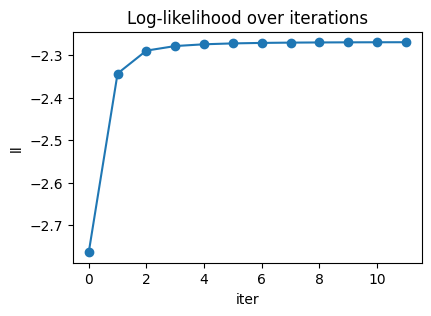

In [8]:
plt.figure(figsize=(4.5, 3))
plt.plot(history.log_likelihood, marker='o')
plt.title('Log-likelihood over iterations')
plt.xlabel('iter')
plt.ylabel('ll')

from pathlib import Path
figs_dir = Path('outputs') / 'figures'
figs_dir.mkdir(parents=True, exist_ok=True)
plt.savefig(figs_dir / '03_em_loglik.png', dpi=150, bbox_inches='tight')


## Step 4: Mean trajectories

Watch the means walk toward the clusters.



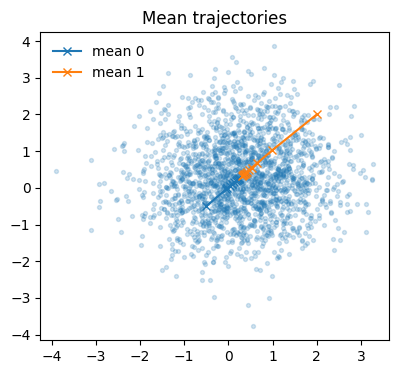

In [9]:
means = np.stack(history.means)  # [iters, K, dim]
plt.figure(figsize=(4.5, 4))
plt.scatter(data.X[:,0], data.X[:,1], s=8, alpha=0.2)
plt.plot(means[:,0,0], means[:,0,1], marker='x', label='mean 0')
plt.plot(means[:,1,0], means[:,1,1], marker='x', label='mean 1')
plt.title('Mean trajectories')
plt.legend(frameon=False)

from pathlib import Path
figs_dir = Path('outputs') / 'figures'
figs_dir.mkdir(parents=True, exist_ok=True)
plt.savefig(figs_dir / '03_em_means.png', dpi=150, bbox_inches='tight')


## Step 5: Assignment entropy

Soft assignments become more confident over time.



Text(0, 0.5, 'entropy')

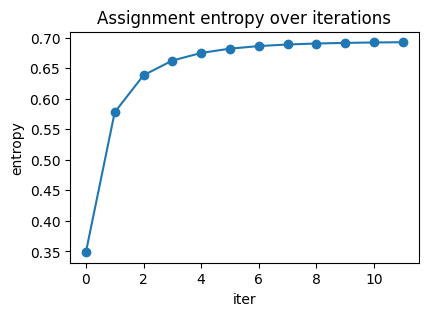

In [10]:
plt.figure(figsize=(4.5, 3))
plt.plot(history.entropy, marker='o')
plt.title('Assignment entropy over iterations')
plt.xlabel('iter')
plt.ylabel('entropy')

from pathlib import Path
figs_dir = Path('outputs') / 'figures'
figs_dir.mkdir(parents=True, exist_ok=True)
plt.savefig(figs_dir / '03_em_entropy.png', dpi=150, bbox_inches='tight')


## Observations → Why → SSL opportunity

**What you’ll likely see**

- Log‑likelihood improves steadily (not in one step).

- Means move gradually toward the true clusters.

- Assignment entropy shrinks over iterations.



**Why this happens**

- Overlap makes cluster membership ambiguous.

- EM refines soft beliefs before hardening them.



**SSL opportunity**

- This mirrors pseudo‑labeling: soft beliefs evolve, then stabilize.

- It also motivates stabilizers that slow down early mistakes.

